## **Import and Datasets extraction**
Extraction of the VGG-Face weights and the datasets used.

In [ ]:
from math import *
import numpy as np
import zipfile
import os
import tensorflow as tf
import random
import pandas as pd
import cv2
import keras.backend as K
import h5py
import gdown
from google.colab import drive

drive.mount("/content/drive")


!cd /content/sample_data
! find . -name "*.pyc" -delete


with zipfile.ZipFile("/content/drive/My Drive/Affective_Network/archive.zip","r") as z:
    z.extractall(".")
with zipfile.ZipFile("/content/drive/My Drive/Affective_Network/vgg_face_weights.h5.zip","r") as z:
    z.extractall(".")
with zipfile.ZipFile("/content/drive/My Drive/Affective_Network/Validation.zip","r") as z:
    z.extractall(".")

print(os.listdir("../content"))

*Definition of the 7 emotions described in the datasets and separation into training, validation and test sets.*

In [ ]:
CATEGORIES=["angry","disgust","fear","happy","neutral","sad","surprise"] 
OUTPUT_SHAPE=7
INPUT_SHAPE=(48, 48, 3)
training_data=[]
test_data=[]
validation_data=[]

def create_training_data():
  for category in CATEGORIES:
    class_num=CATEGORIES.index(category)
    for img in os.listdir("/content/train/"+category):
      try:
        img_array=cv2.imread(os.path.join("/content/train/"+category,img))
        img_array=cv2.resize(img_array,(48,48))
        training_data.append([img_array,class_num])
      except Exception as e:
        pass

def create_validation_data():
  for category in CATEGORIES:
    class_num=CATEGORIES.index(category)
    for img in os.listdir("/content/CK+48/"+category):
      try:
        img_array=cv2.imread(os.path.join("/content/CK+48/"+category,img))
        img_array=cv2.resize(img_array,(48,48))
        validation_data.append([img_array,class_num])
      except Exception as e:
        pass

def create_test_data():
  for category in CATEGORIES:
    class_num=CATEGORIES.index(category)
    for img in os.listdir("/content/test/"+category):
      try:
        img_array=cv2.imread(os.path.join("/content/test/"+category,img))
        img_array=cv2.resize(img_array,(48,48))
        test_data.append([img_array,class_num])
      except Exception as e:
        pass
    

create_training_data()
random.shuffle(training_data)

create_validation_data()
random.shuffle(validation_data)

create_test_data()
random.shuffle(test_data)

X=[]
y=[]
Xval=[]
yval=[]
Xtest=[]
ytest=[]

for features,label in training_data:
  X.append(features)
  y.append(label)

for features,label in validation_data:
  Xval.append(features)
  yval.append(label)

for features,label in test_data:
  Xtest.append(features)
  ytest.append(label)

*Data Normalization*

In [ ]:
X=np.array(X)
X=X/255.0
y=np.array(y)
y=tf.keras.utils.to_categorical(y, 7)

Xval=np.array(Xval)
Xval=Xval/255.0
yval=np.array(yval)
yval=tf.keras.utils.to_categorical(yval, 7)

Xtest=np.array(Xtest)
#Xtest = Xtest.reshape(Xtest.shape[0],48,48,3)
Xtest=Xtest/255.0
ytest=np.array(ytest)
ytest=tf.keras.utils.to_categorical(ytest, 7)

print(X[10])
print(y[10])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['.config', 'train', 'CK+48', 'Armand.jpg', 'vgg_face_weights.h5', 'test', 'drive', 'ck', 'sample_data']
[[[0.62352941 0.62352941 0.62352941]
  [0.60784314 0.60784314 0.60784314]
  [0.61176471 0.61176471 0.61176471]
  ...
  [0.49411765 0.49411765 0.49411765]
  [0.74509804 0.74509804 0.74509804]
  [0.76470588 0.76470588 0.76470588]]

 [[0.60784314 0.60784314 0.60784314]
  [0.60784314 0.60784314 0.60784314]
  [0.61568627 0.61568627 0.61568627]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.65098039 0.65098039 0.65098039]
  [0.77647059 0.77647059 0.77647059]]

 [[0.62745098 0.62745098 0.62745098]
  [0.57254902 0.57254902 0.57254902]
  [0.56078431 0.56078431 0.56078431]
  ...
  [0.34509804 0.34509804 0.34509804]
  [0.51372549 0.51372549 0.51372549]
  [0.74509804 0.74509804 0.74509804]]

 ...

 [[0.42352941 0.42352941 0.42352941]
  [0.28235294 0.28235294 0.282352

## **Models defined**
Desccription of every model defined.

In [ ]:

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D,ZeroPadding2D,Convolution2D,Input
! pip install keras_applications
! pip install keras_vggface
from keras_vggface.vggface import VGGFace
#from keras.engine import Model
from keras.regularizers import l2


MODEL_TYPES=['simple_cnn', 'resnet50v2', 'capsnet', 'vgg16'] # just for informationnal purposes
MODEL_TYPE='vgg16'
EPOCHS=50

model = None

if MODEL_TYPE == 'capsnet':
    model, _, _ = capsulenet.CapsNet(input_shape=INPUT_SHAPE, n_class=OUTPUT_SHAPE, routings=4)
    #inpt = tf.keras.layers.Input(INPUT_SHAPE)
    
    #x = tf.keras.layers.Conv2D(128, kernel_size=5)(inpt)
    
    #x = capsulelayers.PrimaryCap(x, dim_capsule=8, n_channels=32,
    #                             kernel_size=5, strides=2, padding='valid')

    
    #x = capsulelayers.CapsuleLayer(num_capsule=OUTPUT_SHAPE, dim_capsule=16,
    #                              routings=4)(x)
    #model = tf.keras.models.Model(inputs=[inpt], outputs=[x])
elif MODEL_TYPE == 'simple_cnn':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(INPUT_SHAPE))
    model.add(tf.keras.layers.Conv2D(16, (3,3)))
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.Dense(64))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.PReLU())
    model.add(tf.keras.layers.Dense(OUTPUT_SHAPE, activation='softmax'))
elif MODEL_TYPE == 'vgg_face':
    
    vgg_x = VGGFace(model = 'vgg16', weights = 'vggface', input_shape = (48,48,3), include_top = False)
    last_layer = vgg_x.get_layer('pool5').output
    x = Flatten(name='flatten')(last_layer)
    out = Dense(7, activation='softmax', name='fc8',kernel_regularizer=l2(1e-6))(x)
    model = Model(vgg_x.input, out)

    #model.load_weights('/content/vgg_face_weights.h5')

elif MODEL_TYPE == 'vgg16':

    inpt = tf.keras.layers.Input(INPUT_SHAPE)
    vgg16 = tf.keras.applications.VGG16(
    include_top=False, weights='imagenet', input_tensor=inpt,
    )
    #for layer in resnet.layers[:1]:
    #    layer.trainable = False
    x = vgg16.outputs[0]
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(OUTPUT_SHAPE, activation='softmax')(x)
    #vggface
    model = tf.keras.Model(vgg16.inputs, x)
    VGG=tf.keras.applications.VGG16(input_shape=INPUT_SHAPE,include_top=False,weights='imagenet')
    VGG.trainable=False
    model=keras.Sequential([VGG,
                            keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=256, activation='relu'),
                            tf.keras.layers.Dense(units=256, activation='relu'),
                            tf.keras.layers.Dense(units=7, activation='softmax')])
    
    #model.load_weights('/content/vgg_face_weights.h5')
    

## **Fine-Tuning**

In [ ]:
base_model = VGGFace(model = 'vgg16', weights = 'vggface', input_shape = (48,48,3), include_top = False)

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(48, 48, 3))


# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(units=7, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
vggface_vgg16 (Functional)   (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 3591      
Total params: 14,718,279
Trainable params: 3,591
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:

checkpoint_path = "/content/sample_data/"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='accuracy',verbose=1,
                                                 save_weights_only=True,
                                                 save_freq = "epoch")

train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
validation_dataset = tf.data.Dataset.from_tensor_slices((Xval, yval))
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest, ytest))
train_dataset=train_dataset.batch(batch_size=32)
validation_dataset=validation_dataset.batch(batch_size=32)
test_dataset=test_dataset.batch(batch_size=32)

model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-2),#or cgd,
              loss=('categorical_crossentropy'),
              metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.FalseNegatives()]
             )

epochs = 20
model.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
898/898 [==============================] - 35s 36ms/step - loss: 1.5573 - accuracy: 0.3958 - precision: 0.6049 - recall: 0.1216 - false_negatives: 12637.9199 - val_loss: 2.2431 - val_accuracy: 0.1916 - val_precision: 0.2072 - val_recall: 0.0469 - val_false_negatives: 935.0000
Epoch 2/20
898/898 [==============================] - 32s 35ms/step - loss: 1.5389 - accuracy: 0.4062 - precision: 0.6289 - recall: 0.1195 - false_negatives: 12629.0033 - val_loss: 2.2602 - val_accuracy: 0.1947 - val_precision: 0.1796 - val_recall: 0.0591 - val_false_negatives: 923.0000
Epoch 3/20
898/898 [==============================] - 32s 35ms/step - loss: 1.5270 - accuracy: 0.4108 - precision: 0.6332 - recall: 0.1260 - false_negatives: 12546.0100 - val_loss: 2.2442 - val_accuracy: 0.2029 - val_precision: 0.1958 - val_recall: 0.0663 - val_false_negatives: 916.0000
Epoch 4/20
898/898 [==============================] - 32s 36ms/step - loss: 1.5170 - accuracy: 0.4157 - precision: 0.6361 - recall: 0.13

In [ ]:
#base_model.trainable = True
model.summary()


model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=1e-4),#or cgd,
              loss=('categorical_crossentropy'),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.FalseNegatives()]
             )

epochs = 20
history=model.fit(train_dataset,epochs=epochs,validation_data=validation_dataset,callbacks=[cp_callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 256)               131328    
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 256)               65792     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 7)                 1799      
Total params: 14,913,607
Trainable params: 198,919
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
898/898 [==============================] - 31s 33ms/step - loss: 1.3793 - accuracy: 0.4761 - 

## **Model fitting**

In [ ]:
!cd /content/sample_data

checkpoint_path = "/content/sample_data/"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='accuracy',verbose=1,
                                                 save_weights_only=True,
                                                 save_freq = "epoch")

train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
validation_dataset = tf.data.Dataset.from_tensor_slices((Xval, yval))
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest, ytest))
train_dataset=train_dataset.batch(batch_size=32)
validation_dataset=validation_dataset.batch(batch_size=32)
test_dataset=test_dataset.batch(batch_size=32)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),#or Nadam,
              loss=('categorical_crossentropy'),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.FalseNegatives()]
             )

history=model.fit(train_dataset,epochs=50,validation_data=validation_dataset,callbacks=[cp_callback])

Epoch 1/50
898/898 [==============================] - 60s 16ms/step - loss: 1.8442 - accuracy: 0.2347 - precision: 0.0000e+00 - recall: 0.0000e+00 - false_negatives: 7215.9821 - val_loss: 2.1560 - val_accuracy: 0.2090 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_false_negatives: 29220.6445

Epoch 00001: saving model to /content/sample_data/
Epoch 2/50
898/898 [==============================] - 31s 34ms/step - loss: 1.7529 - accuracy: 0.2799 - precision: 0.0000e+00 - recall: 0.0000e+00 - false_negatives: 36905.9673 - val_loss: 2.1669 - val_accuracy: 0.2130 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_false_negatives: 58910.6445

Epoch 00002: saving model to /content/sample_data/
Epoch 3/50
898/898 [==============================] - 31s 34ms/step - loss: 1.7202 - accuracy: 0.3095 - precision: 0.3254 - recall: 2.0103e-05 - false_negatives: 66594.4997 - val_loss: 2.1700 - val_accuracy: 0.2273 - val_precision: 0.7181 - val_recall: 2.0133e-04 - val_false_negatives

## **Evaluation**

In [ ]:
model.evaluate(Xtest,ytest, verbose=True)


225/225 [==============================] - 4s 15ms/step - loss: 1.4858 - accuracy: 0.4565 - precision_1: 0.7452 - recall_1: 0.3014 - false_negatives_1: 417333.6875


[1.485764503479004,
 0.45653384923934937,
 0.7451750636100769,
 0.3014353811740875,
 417333.6875]

##**Plot**


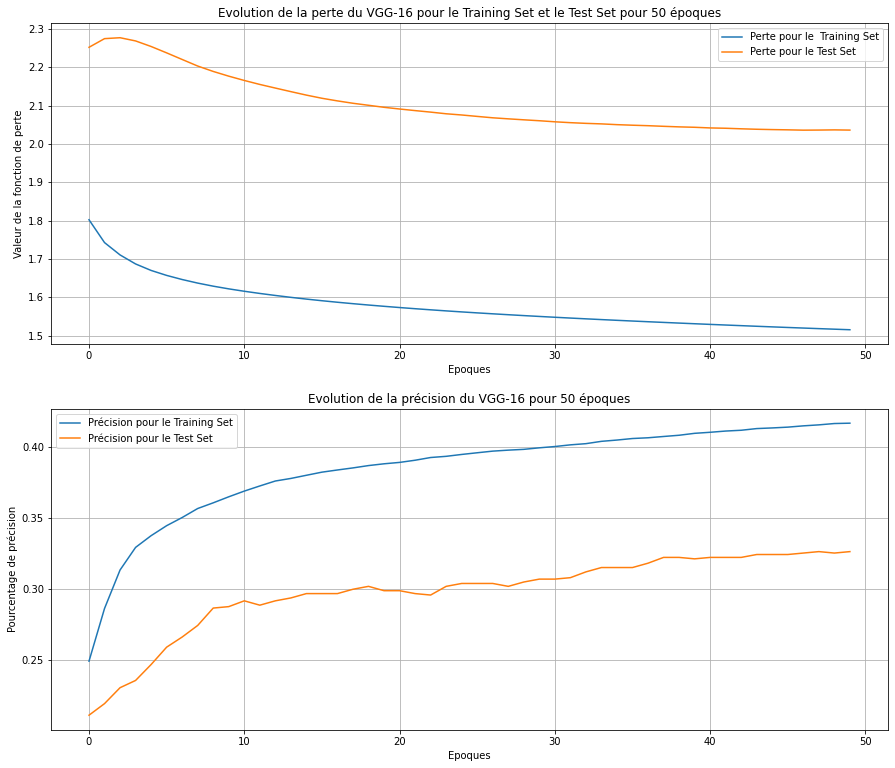

INFO:tensorflow:Assets written to: /content/sample_data/assets


INFO:tensorflow:Assets written to: /content/sample_data/assets


NotImplementedError: ignored

In [ ]:
import matplotlib.pyplot as plt

h = history.history

plt.figure(figsize = (15, 13))

plt.subplot(2,1,1)
plt.plot(history.epoch, h['loss'], label='Perte pour le  Training Set')
plt.plot(history.epoch, h['val_loss'], label='Perte pour le Test Set')
plt.title("Evolution de la perte du VGG-16 pour le Training Set et le Test Set pour 50 époques")
plt.xlabel("Epoques")
plt.ylabel("Valeur de la fonction de perte")
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.epoch, h['accuracy'], label='Précision pour le Training Set')
plt.plot(history.epoch, h['val_accuracy'], label='Précision pour le Test Set')
plt.title("Evolution de la précision du VGG-16 pour 50 époques")
plt.xlabel("Epoques")
plt.ylabel("Pourcentage de précision")
plt.grid(True)
plt.legend()
plt.show()

model.save('/content/sample_data')

fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.h5")

## **Confusion Matrix**

In [ ]:
originals = test_dataset.take(60)
originals_numpy = np.concatenate([x[1] for x in originals])
predictions = model.predict(originals, verbose=True)

60/60 [==============================] - 1s 13ms/step


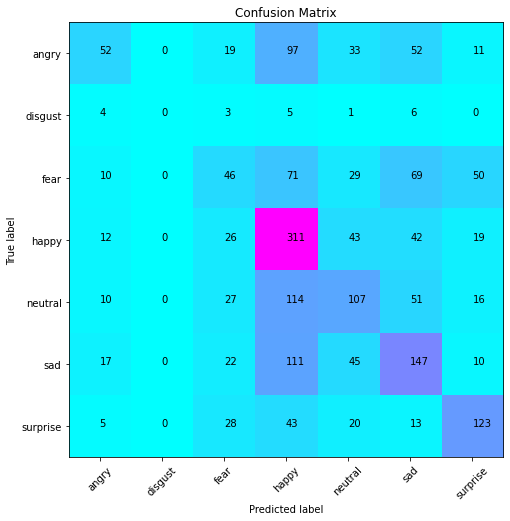

In [ ]:
y_true = np.argmax(originals_numpy, axis=-1)
y_pred = np.argmax(predictions, axis=-1)
conf = tf.math.confusion_matrix(y_true, y_pred, num_classes=OUTPUT_SHAPE)

def plot_confusion_matrix(conf, classNames):
    plt.figure(figsize=(8,8))
    plt.imshow(conf, interpolation='nearest', cmap=plt.cm.cool)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    for i in range(len(classNames)):
        for j in range(len(classNames)):
            plt.text(j, i, str(int(conf[i][j])))
    plt.show()
    
plot_confusion_matrix(conf, CATEGORIES)